In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Setup connection parameters
user = "postgres"
password = "cZ5LH8:["
host = "localhost"
port = "5433"
db = "employee"
uri = f"postgresql://{user}:{password}@{host}:{port}/{db}"

In [3]:
engine = create_engine(uri)

In [4]:
sql = "SELECT salary FROM salaries"
salary_df = pd.read_sql(sql, con=engine)
salary_df

,salary
0,60117
1,65828
2,40006
3,40054
4,78228
...,...
300019,40000
300020,58058
300021,49597
300022,40000


### Histogram - Most common salary ranges for employees

Text(0.5, 1.0, 'Salary Range Of Employees')

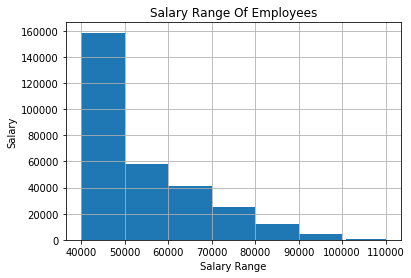

In [5]:
bins = [40000,49999,50000,59999,60000,69999,70000,79999,80000,89999,90000,99999,100000,100999,110000]
salary_df['salary'] = salary_df['salary'].astype('int64')
salary_df.hist(column='salary', bins=bins)

plt.xlabel('Salary Range')
plt.ylabel('Salary')
plt.title('Salary Range Of Employees')

### Bar Chart - Average Salary by title

In [8]:
sql = "SELECT title.title, AVG(CAST (salary AS Float)) AVERAGE_SAL FROM salaries sal join titles title on sal.emp_no = title.emp_no group by title.title"
salary_by_title_df = pd.read_sql(sql, con=engine)
salary_by_title_df

,title,average_sal
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


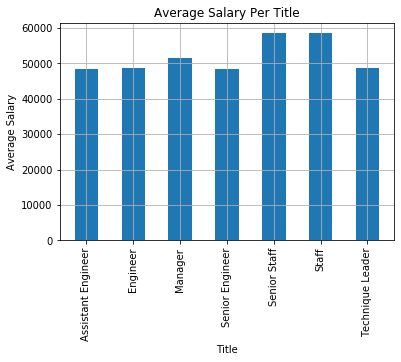

In [17]:
x = salary_by_title_df['title']
y = salary_by_title_df['average_sal']
plt.bar(x,y,linewidth=1,align="center",width=0.5)
plt.xticks(rotation=90)
plt.title('Average Salary Per Title')
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()